# TP8: Linear Programming

This TP8 is about Linear Programming, i.e. modeling and solving decision problems using linear constraints over the real numbers.

We will be using the `cbc `solver of MiniZinc which does implement the Simplex algorithm for solving both satisfiability and optimization problems. 


# Part I. Fourier's Example
We start with the example of Fourier given in his lecture at Académies des Sciences in 1823 for illustrating his method for deciding the satisfiability of a finite set of linear inequalities over the real numbers, and for modeling decision problems with linear constraints.

In his example, the problem is to
* determine in which coordinates (X,Y)
* a given weight p
* can be placed on an isocele-rectangle-triangle table (with the right corner A in coordinates 0,0, B in 0,5 and C in 5,0)
* in such a way that each leg of the triangle table does not support more than 1 weight unit.


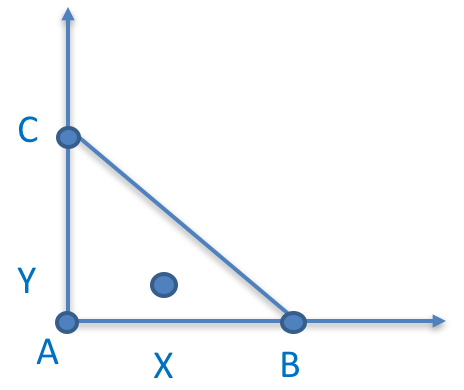

The MiniZinc model below solves this problem.

In [1]:
import inf555

In [2]:
!vimcat.sh Fourier.mzn

% Fourier's 1823 illustrative example for
% modeling and solving decision problems with inequalities over the reals

% Variables
var float: A; % pressures on the 3 legs of an isocele rectangle triangle table    
var float: B;
var float: C;

var float: X;        % position of the weight
var float: Y;

% Data
float: p;               % weight to place

float: xB;          % triangle table placed in A=(0,0) B=(xB,0) C=(0,yC)
float: yC; 

% Constraints

constraint 0<=A /\ A<=1;

constraint 0<=B /\ B<=1;

constraint 0<=C /\C <=1;

constraint A+B+C = p;

constraint p*X = xB*B;

constraint p*Y = yC*C;

% parametric objective function

float: a;
float: b;
float: c;
float: x;
float: y;
var float: f = a*A+b*B+c*C+x*X+y*Y;

solve minimize f;


In [3]:
solution=inf555.minizinc('Fourier.mzn', data={'p':2,'xB':20,'yC':20,'a':0,'b':0,'c':0,'x':0,'y':0}, solver=inf555.cbc)
print(solution)

Solution(objective=0.0, A=1.0, B=1.0, C=0.0, X=10.0, Y=-0.0, _checker='')


In [4]:
solution=inf555.minizinc('Fourier.mzn', data={'p': 2,'X':7,'Y':7,'xB':20,'yC':20,'a':0,'b':0,'c':0,'x':0,'y':0}, solver=inf555.cbc)
print(solution)

Solution(objective=0.0, A=0.6000000000000001, B=0.7, C=0.7, X=7.0, Y=7.0, _checker='')


In [5]:
solution=inf555.minizinc('Fourier.mzn', data={'p':3,'xB':20,'yC':20,'a':0,'b':0,'c':0,'x':0,'y':0}, solver=inf555.cbc)
print(solution)

Solution(objective=0.0, A=1.0, B=1.0, C=1.0, X=6.666666666666667, Y=6.666666666666667, _checker='')


In [6]:
solution=inf555.minizinc('Fourier.mzn', data={'p':4,'xB':20,'yC':20,'a':0,'b':0,'c':0,'x':0,'y':0}, solver=inf555.cbc)
print(solution)
print(solution.status)

None
UNSATISFIABLE


## Question 1. Query the model to determine the placement of a weight of 2.5 units minimizing the force on A


## Question 2.  Determine the region where a  weight of 2.5 units can be placed

* Query the model to determine below that region 

* Write your textual answer here

...



...


# Part II. Production Planning 
In this second part we consider the problem of producing goods with capacity constraints and a profit maximization objective.

More specifically, we consider that a company makes two products: bands and coils

Due to the limited quantity of raw materials for making bands and coils,
* the maximum quantity of bands that can be produced is 6000 tonnes,
* and 4000 tonnes for coils.

Furthermore,
* 200 tonnes of bands can be produced per hour,
* and 140 tonnes of coils per hour,
* and a maximum of 40h can be dedicated to the production.

The profit per tonne of bands produced is 25 euros, and 30 euros for coils.
  

## Question 3. Write a model production.mzn to determine

  - the time B to allocate to the production of bands

  - and the time C to allocate to the production of coils

  - in order to maximize the profit

Explain the result

*write your textual answer here*

...



...


In [ ]:
!vimcat.sh production.mzn

In [ ]:
print(inf555.minizinc('production.mzn', solver=inf555.cbc))

Let us now generalize the problem to any company that makes a list of products, where each product is given with

* the profit in euros per tonne of product produced

* the maximum quantity of product that can be produced for each product

* the number of tonnes produced per hour allocated to the production for each product

* the total time allocated to the production

and the problem is to determine the list of production times allocated for each product (decision variables)
*  satisfying the production data constraints
*  the maximum Time for the production
*  and maximizing the profit



## Question 4.Define in file `generic.mzn` a generic  production planning solver
* by fixing a data format for the capacity constraints and profit function
* and posting and solving the corresponding constraints

Test you program on the data of the simple example above

In [ ]:
!vimcat.sh bandscoils.dzn

In [ ]:
!vimcat.sh generic.mzn

In [ ]:
print(inf555.minizinc('generic.mzn', 'bandscoils.dzn', solver=inf555.cbc))

# Part III. Cost-Benefit Analysis

Back to the problem and data of question 3, we would like now to solve the dual problem of estimating the "shadow prices", or values in euros, of the 3 ressources that constrain our current production capacities, i.e.

* the value of one hour of production (currently limited to 40 hours)

* the value of the raw materials necessary to produce one tonne of bands (currently limited to 6000 tonnes)

* and the value of the raw materials necessary to produce one more tonne of coils (currently limited to 4000 tonnes)

Those positive shadow prices for our 3 ressouces must correspond to a greater or equal value of our current production capacity, and can be interpreted as marginal cost-benefit value for each of them.

They thus represent the minimum prices per unit of our ressource stock at which it would be profitable to sell them in our current production (or the maximum price at which it is reasonable to buy them in order to augment our production profit).

They are determined by minimizing the corresponding value of our current production capacity (since we want minimum prices).

  
##  Question 5.  Write a model `costbenefit.mzn` to solve this problem 

In [ ]:
!vimcat.sh costbenefit.mzn

In [ ]:
print(inf555.minizinc('costbenefit.mzn', solver=inf555.cbc))

## Question 6. Explain the result
...



...



...
